In [27]:
#!pip install psycopg2


In [28]:
import psycopg2
import pandas as pd
import csv

### verify the conexion
try:
    # Connect to the database
    conn = psycopg2.connect(
        host="pg.ujueta.com",
        port="5432",
        user="consultoria",
        password="LmKTXJBXya!14]f9!2k]",
        database="postgres",
    )
except psycopg2.Error as e:
    print("Error connecting to the database:")
    print(e)
else:
    print("Connection established successfully")

Connection established successfully


In [29]:

### ventas diario apiladas
def export_forecast_to_csv():
    try:
        # connect to the database
        conn = psycopg2.connect(
            host="pg.ujueta.com",
            port="5432",
            user="consultoria",
            password="LmKTXJBXya!14]f9!2k]",
            database="postgres",
        )

        # create cursor
        with conn.cursor() as cur:

            # ececute a sql query

            cur.execute("SELECT * FROM forecast.ventas_diario")

            # fetch the results
            results = cur.fetchall()

            # open a file in the downloads folder

            with open(
                r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\outputs.csv",
                #"/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/outputs.csv",
                "w",
                newline="",
            ) as f:
                # create a csv writer
                writer = csv.writer(f)

                # write the column names
                writer.writerow([col[0] for col in cur.description])

                # write the query results
                writer.writerows(results)
    except Exception as e:
        print(f"An error ocurred: {e}")
    finally:
        # close the cursor and connection
        if conn:
            conn.close()


# Call the function to export data to csv
export_forecast_to_csv()


In [116]:


### manipulate data

import pandas as pd

# carga de datas
data = pd.read_csv(
    #r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\outputs.csv"
    r"/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/outputs.csv"
)
# convertir en dataframe
df = pd.DataFrame(data)
df.head()

,docdate,codigo_articulo,cantidad
0,2022-01-03,AUACALR4,1
1,2022-01-03,AUACCH1,5
2,2022-01-03,AUACPB400,1
3,2022-01-03,AUACRIM4F,5
4,2022-01-03,AUACSH1000,3


In [117]:
df.shape

(87675, 3)

In [118]:
import pandas as pd

def sumarizar_a_mensual(df, fecha_col, suma_col, agrupar_por=None):
    """
    Función para sumarizar datos diarios a un nivel mensual.

    Parámetros:
    ----------
    df : pd.DataFrame
        El DataFrame de entrada con los datos a procesar.
    fecha_col : str
        Nombre de la columna que contiene las fechas.
    suma_col : str
        Nombre de la columna cuyos valores se desean sumarizar.
    agrupar_por : list, optional
        Lista de columnas adicionales para agrupar (por defecto es None).
    
    Retorna:
    -------
    pd.DataFrame
        DataFrame con los datos agregados a nivel mensual.
    """
    # Asegurar que la columna de fecha esté en formato datetime
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')
    
    # Filtrar filas con fechas válidas
    df = df.dropna(subset=[fecha_col])
    
    # Crear la clave de agrupación mensual
    df['date'] = df[fecha_col].dt.to_period('M').dt.to_timestamp()

    # Configurar las columnas para agrupar
    group_cols = ['date'] + (agrupar_por if agrupar_por else [])

    # Realizar la agrupación y sumarización
    resultado = (
        df.groupby(group_cols, as_index=False)[suma_col]
        .sum()
    )

    return resultado


# Usar la función
df = sumarizar_a_mensual(
    df, 
    fecha_col='docdate', 
    suma_col='cantidad', 
    agrupar_por=['codigo_articulo']
)

print(df)

In [119]:
# List of SKUs to filter
selected_skus = [
                    'AUACALM4','AUACALS4','AUACBD850','AUACEG250','AUACSC901','AUELCR433','AUELMC5','HEELAG114',
                     'HEELAG1165','HEELAIRKIT5','HEELCA1024S','HEELCA6205','HEELCHS16','HEELEB7056','HEELEB90758','HEELEP181',
                     'HEELHG1600','HEELID600','HEELPS250','HEELPS350','HEELPW1565','HEELPW2275','HEELRM9026','HEELSP500',
                     'HEELVC0115P','HEELVC0640P','HEELVC2525P','HEELXAG20','HEFUFC25','HEFUFCD10','HEFUFHG18','SOELCSVM510',
                     'SOELCSVM760','SOELPES6300','SOELPMS6505','SOELSI7130MP','SOELSI7150DV','SOELSI7160XP','SOELSI7200XP',
                     'SOELSI8180MP','SOELSI9180DV','SOELSI9220DV','SOFUFW125','SOFUFW161M','SOSWC1-611','SOSWC1-651',
                     'SOSWC1-811','SOSWG2-210','SOSWG2-214','SOSWM1-111','SOSWM3-215','SOSWM3-315','SOSWM3-317','SOSWP2-511',
                      'SOSWP2-513','SOSWP2-514','SOSWP2-516','SOSWSWA153N'
]

# Filter the dataset
filtered_df = df[df['codigo_articulo'].isin(selected_skus)]

In [120]:
print("Número de SKUs :", len(selected_skus))

Número de SKUs : 58


In [121]:
print(filtered_df)

          docdate codigo_articulo  cantidad
6      2022-01-03       AUELCR433         5
8      2022-01-03         AUELMC5         3
9      2022-01-03       HEELAG114        14
11     2022-01-03      HEELAG1165         0
17     2022-01-03      HEELEB7056         5
...           ...             ...       ...
87657  2024-11-19      SOSWP2-511         2
87659  2024-11-19      SOSWP2-513         1
87660  2024-11-19      SOSWP2-514         1
87662  2024-11-19      SOSWP2-516         6
87665  2024-11-19     SOSWSWA153N         4

[28377 rows x 3 columns]


In [122]:
data_mediumdda = filtered_df[filtered_df['docdate'] >= '2022-01-01']
data_mediumdda

,docdate,codigo_articulo,cantidad
6,2022-01-03,AUELCR433,5
8,2022-01-03,AUELMC5,3
9,2022-01-03,HEELAG114,14
11,2022-01-03,HEELAG1165,0
17,2022-01-03,HEELEB7056,5
...,...,...,...
87657,2024-11-19,SOSWP2-511,2
87659,2024-11-19,SOSWP2-513,1
87660,2024-11-19,SOSWP2-514,1
87662,2024-11-19,SOSWP2-516,6


In [123]:
#========================================================================================================================================
# Ajuste de Datos para statsforecast
#========================================================================================================================================

#-- Dato de ejemplo para función

def data_sf(df, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo'):
    df_m = df[[date, y, unique_id]]
    df_m.rename(columns={date : 'ds', y :'y', unique_id: 'unique_id'}, inplace=True)
  
    return df_m

df_m = data_sf(data_mediumdda, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo')
df_m
df_m.info()




<class 'pandas.core.frame.DataFrame'>
Index: 28377 entries, 6 to 87665
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ds         28377 non-null  object
 1   y          28377 non-null  int64 
 2   unique_id  28377 non-null  object
dtypes: int64(1), object(2)
memory usage: 886.8+ KB


In [124]:
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
from statsforecast import StatsForecast #- Para instanciar los  modelos
from statsforecast.models import Naive

from statsforecast.models import (
    AutoARIMA,
    AutoETS,
    HoltWinters,
    ADIDA,
    CrostonClassic as Croston, 
    IMAPA,
    TSB,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    Naive,
    SeasonalNaive,
    Theta,
    WindowAverage,
    Holt,
    CrostonOptimized,
)

#-- Parametros

# Número de días en el futuro a pronosticar
horizon = 90
# Ventana estacional: es 7 porque tenemos datos diarios
season_length = 7
# El número de dias que el modelo usará para hacer el forecast 
window_size = 30

# Lista de modelos a evaluar
models = [
    AutoARIMA(season_length=season_length),
    AutoETS(season_length=season_length),
    HoltWinters(season_length=season_length),
    ADIDA(),
    Croston(),
    IMAPA(),
    TSB(alpha_d = 0.2, alpha_p = 0.2),
    HistoricAverage(),
    DOT(season_length=season_length),
    Naive(),
    SeasonalNaive(season_length=season_length),
    Theta(),
    WindowAverage(window_size=12),  # Adjust `window_size` as needed
    Holt() ,
    CrostonOptimized()
]

In [125]:
# StatsForecast.plot(df_m)

# Instanciando StatsForecast como sf
sf = StatsForecast( 
    models=models,
    freq='D', #MS
    n_jobs=-1,
)


In [126]:
try:
    crossvaldation_df = sf.cross_validation(
        df=df_m,
        h=horizon,
        step_size=horizon,
        n_windows=3
    )
except ZeroDivisionError as e:
    print(f"Error: {e}")

/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [127]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y'], errors='ignore').columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

evaluation_df = evaluate_cross_validation(crossvaldation_df.reset_index(drop=False), smape)
evaluation_df.head(22)

,AutoARIMA,AutoETS,HoltWinters,ADIDA,CrostonClassic,IMAPA,TSB,HistoricAverage,DynamicOptimizedTheta,Naive,SeasonalNaive,Theta,WindowAverage,Holt,CrostonOptimized,best_model
unique_id,,,,,,,,,,,,,,,,
AUACALM4,0.802787,0.615772,0.616084,0.634265,0.636666,0.634265,0.650264,0.615701,0.634265,0.607226,0.618261,0.634408,0.628585,0.618078,0.636666,Naive
AUACALS4,0.721972,0.639327,0.636055,0.603763,0.603820,0.603763,0.598430,0.588698,0.595681,0.580114,0.614360,0.614152,0.607196,0.644691,0.603820,Naive
AUACBD850,0.932645,0.501160,0.522951,0.433253,0.434289,0.433253,0.408331,0.501114,0.434055,0.386408,0.414983,0.438373,0.415748,0.525766,0.434289,Naive
AUACEG250,0.596720,0.422588,0.492295,0.426741,0.426862,0.426741,0.442387,0.488434,0.432478,0.489432,0.450991,0.451629,0.431518,0.409415,0.426862,Holt
AUACSC901,0.616651,0.627496,0.628861,0.473061,0.470327,0.473061,0.479540,0.551871,0.472549,0.432375,0.452820,0.429236,0.459948,0.624848,0.473339,Theta
AUELCR433,0.448535,0.456316,0.475375,0.467098,0.465698,0.467098,0.452918,0.396837,0.467098,0.511660,0.486269,0.473965,0.492732,0.457056,0.465698,HistoricAverage
AUELMC5,0.405892,0.432719,0.536081,0.395033,0.395294,0.395033,0.397441,0.432676,0.395033,0.384262,0.408655,0.391840,0.393981,0.449841,0.395294,Naive
HEELAG114,0.825643,0.476003,0.457872,0.467152,0.471579,0.467152,0.486483,0.481946,0.467152,0.612165,0.501415,0.465870,0.469455,0.457659,0.471579,Holt
HEELAG1165,0.859374,0.465251,0.469186,0.471692,0.471708,0.471692,0.475103,0.465213,0.471692,0.618508,0.468138,0.471355,0.454942,0.468269,0.473477,WindowAverage


In [103]:
#--- Selección del mejor modelo
fcst_df = sf.forecast(df=df_m, 
                      h=horizon, 
                      ## level=[90]
                     )
fcst_df.head()

/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoETS,HoltWinters,ADIDA,CrostonClassic,IMAPA,TSB,HistoricAverage,DynamicOptimizedTheta,Naive,SeasonalNaive,Theta,WindowAverage,Holt,CrostonOptimized
unique_id,,,,,,,,,,,,,,,,
AUACALM4,2024-11-19,6.898320,24.198463,21.723112,16.865416,16.865486,16.865416,14.943168,24.219936,16.865417,10.0,50.0,16.800253,20.166666,24.352516,16.865486
AUACALM4,2024-11-20,6.746086,24.198463,17.903400,16.865416,16.865486,16.865416,14.943168,24.219936,16.865417,10.0,51.0,16.793737,20.166666,24.348494,16.865486
AUACALM4,2024-11-21,2.763901,24.198463,14.855838,16.865416,16.865486,16.865416,14.943168,24.219936,16.865417,10.0,15.0,16.787222,20.166666,24.345272,16.865486
AUACALM4,2024-11-22,2.839269,24.198463,13.185132,16.865416,16.865486,16.865416,14.943168,24.219936,16.865417,10.0,25.0,16.780706,20.166666,24.342693,16.865486
AUACALM4,2024-11-23,3.911279,24.198463,19.422970,16.865416,16.865486,16.865416,14.943168,24.219936,16.865417,10.0,2.0,16.774191,20.166666,24.340630,16.865486


In [88]:
#-- Revisión para eliminar pornosticos constantes
#fcst_df.reset_index(drop=False).groupby(['unique_id']).std()

/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


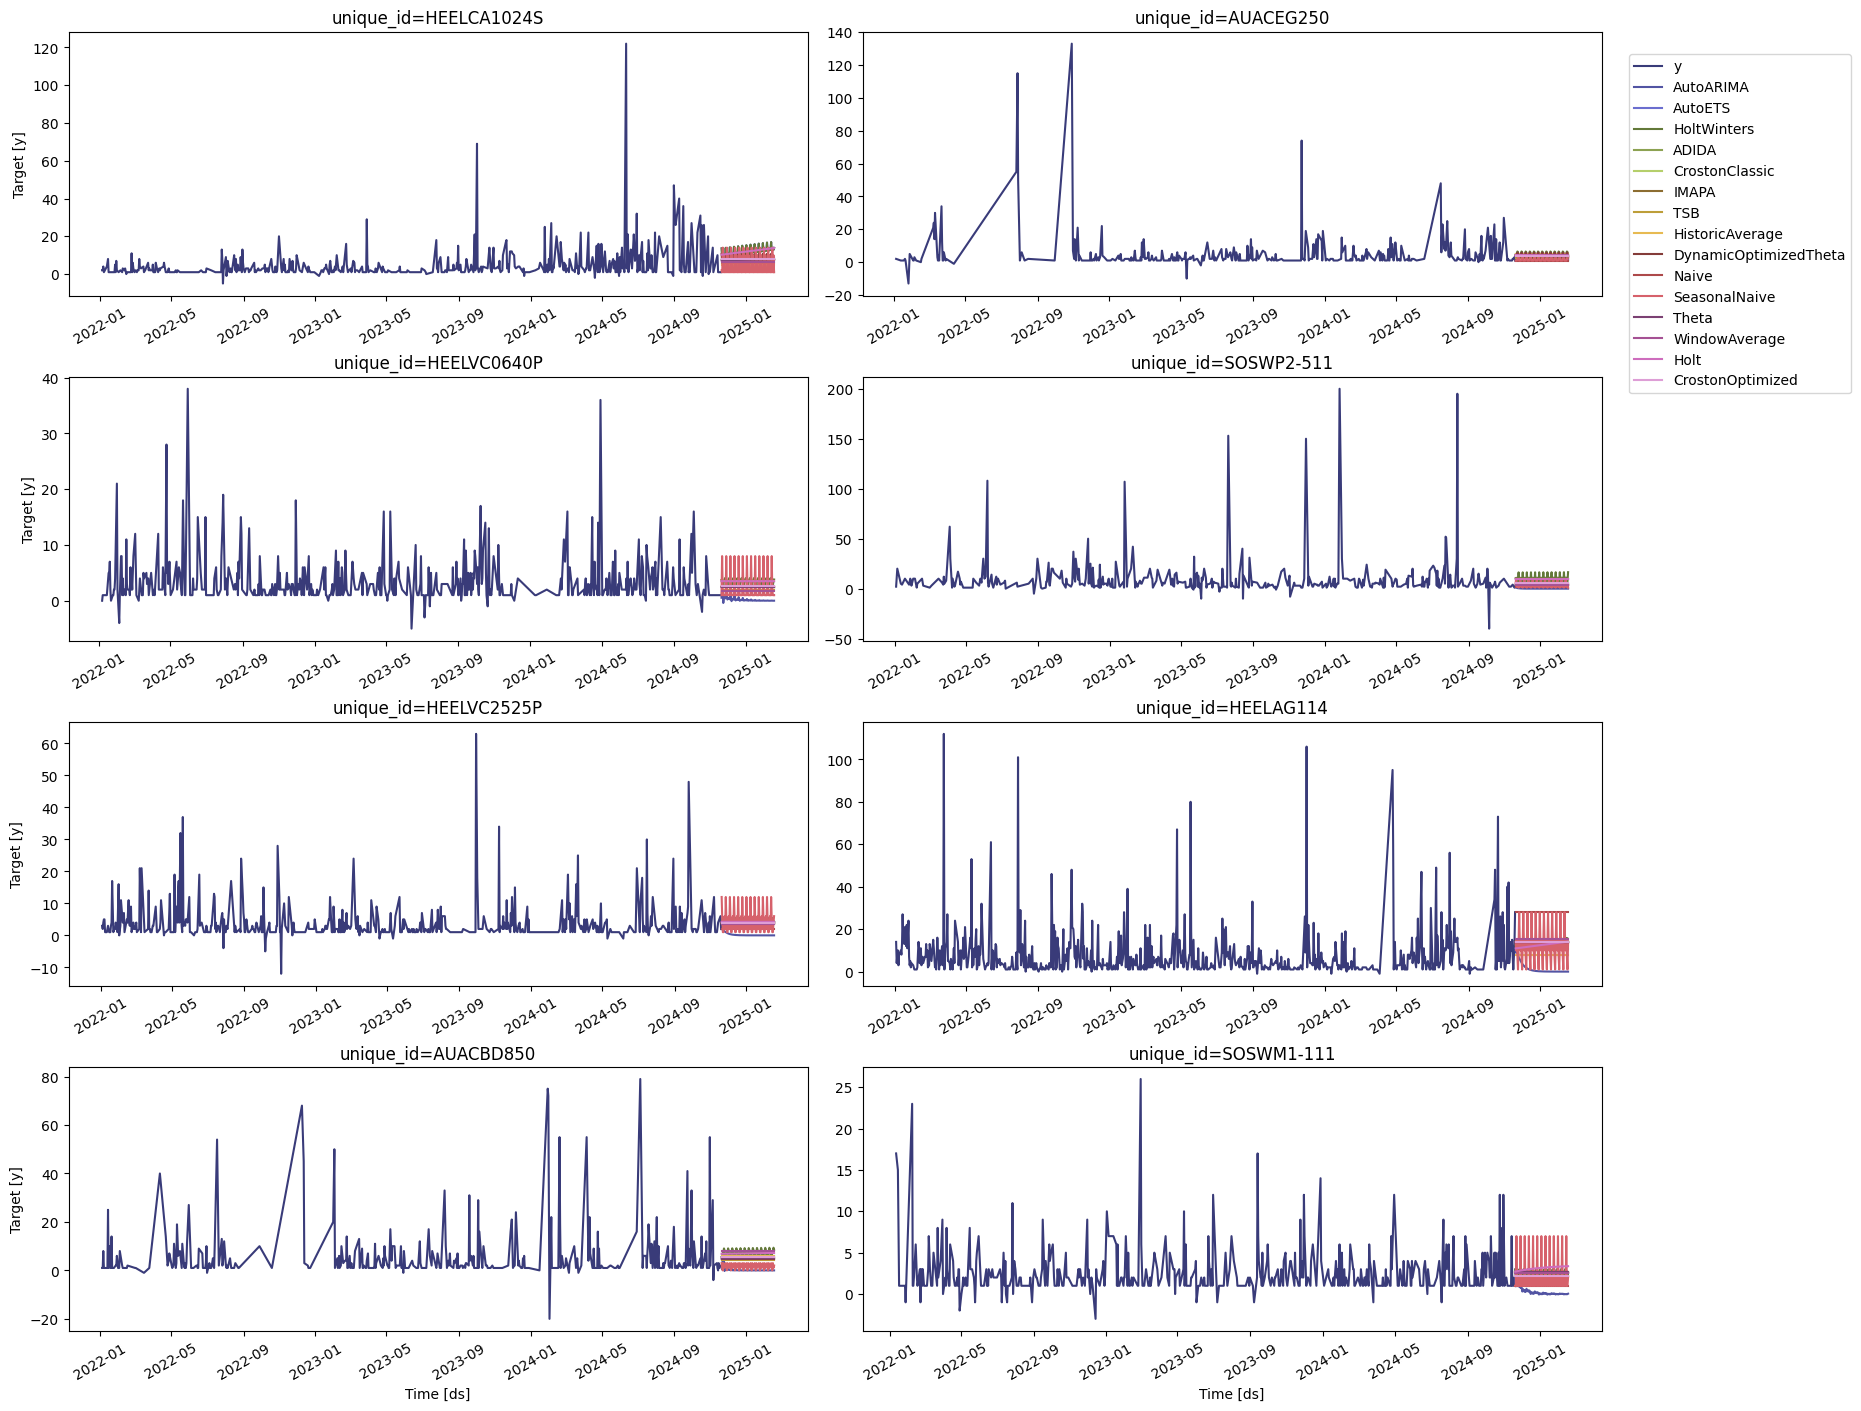

In [128]:
sf.plot(df_m,fcst_df)

In [129]:
fcst_df

,ds,AutoARIMA,AutoETS,HoltWinters,ADIDA,CrostonClassic,IMAPA,TSB,HistoricAverage,DynamicOptimizedTheta,Naive,SeasonalNaive,Theta,WindowAverage,Holt,CrostonOptimized
unique_id,,,,,,,,,,,,,,,,
AUACALM4,2024-11-19,6.898320,24.198463,21.723112,16.865416,16.865486,16.865416,14.943168,24.219936,16.865417,10.0,50.0,16.800253,20.166666,24.352516,16.865486
AUACALM4,2024-11-20,6.746086,24.198463,17.903400,16.865416,16.865486,16.865416,14.943168,24.219936,16.865417,10.0,51.0,16.793737,20.166666,24.348494,16.865486
AUACALM4,2024-11-21,2.763901,24.198463,14.855838,16.865416,16.865486,16.865416,14.943168,24.219936,16.865417,10.0,15.0,16.787222,20.166666,24.345272,16.865486
AUACALM4,2024-11-22,2.839269,24.198463,13.185132,16.865416,16.865486,16.865416,14.943168,24.219936,16.865417,10.0,25.0,16.780706,20.166666,24.342693,16.865486
AUACALM4,2024-11-23,3.911279,24.198463,19.422970,16.865416,16.865486,16.865416,14.943168,24.219936,16.865417,10.0,2.0,16.774191,20.166666,24.340630,16.865486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SOSWSWA153N,2025-02-13,4.360186,4.471063,2.490419,7.556475,7.579114,7.556475,11.763689,4.462264,7.556474,4.0,1.0,7.361008,6.583333,4.460590,7.579114
SOSWSWA153N,2025-02-14,4.360184,4.471063,1.994420,7.556475,7.579114,7.556475,11.763689,4.462264,7.556474,4.0,1.0,7.358951,6.583333,4.460590,7.579114
SOSWSWA153N,2025-02-15,4.360183,4.471063,3.900269,7.556475,7.579114,7.556475,11.763689,4.462264,7.556474,4.0,1.0,7.356893,6.583333,4.460590,7.579114


In [90]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    col_bm = evaluation_df['best_model'].values[0]
    df = forecasts_df[col_bm] # Wide to long 
    df = df.reset_index(drop=False)
    df.columns = ['unique_id', 'best_model']
    return df

prod_forecasts_df = get_best_model_forecast(forecasts_df = fcst_df, 
                                            evaluation_df = evaluation_df)
prod_forecasts_df

,unique_id,best_model
0,AUACALM4,10.0
1,AUACALM4,10.0
2,AUACALM4,10.0
3,AUACALM4,10.0
4,AUACALM4,10.0
...,...,...
5215,SOSWSWA153N,4.0
5216,SOSWSWA153N,4.0
5217,SOSWSWA153N,4.0
5218,SOSWSWA153N,4.0


In [132]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    # Clean and standardize column names
    forecasts_df.columns = forecasts_df.columns.str.strip().str.lower()
    evaluation_df['best_model'] = evaluation_df['best_model'].str.strip().str.lower()
    
    # Reset index to ensure 'unique_id' is a column
    forecasts_df = forecasts_df.reset_index()
    
    # Merge evaluation_df with forecasts_df
    merged_df = evaluation_df.merge(forecasts_df, on='unique_id', how='left')
    
    rows = []
    for _, row in merged_df.iterrows():
        best_model = row['best_model']
        
        # Validate best_model column
        if best_model not in forecasts_df.columns:
            raise KeyError(f"Model '{best_model}' not found in forecasts_df columns: {forecasts_df.columns.tolist()}")
        
        # Append the forecast value for the best model
        rows.append({'unique_id': row['unique_id'], 'ds': row['ds'], 'best_model': row[best_model]})
    
    # Convert to a dataframe
    result_df = pd.DataFrame(rows)
    return result_df

# Example usage
prod_forecasts_df = get_best_model_forecast(forecasts_df=fcst_df, evaluation_df=evaluation_df)

prod_forecasts_df

,unique_id,ds,best_model
0,AUACALM4,2024-11-19,10.000000
1,AUACALM4,2024-11-20,10.000000
2,AUACALM4,2024-11-21,10.000000
3,AUACALM4,2024-11-22,10.000000
4,AUACALM4,2024-11-23,10.000000
...,...,...,...
5215,SOSWSWA153N,2025-02-13,6.583333
5216,SOSWSWA153N,2025-02-14,6.583333
5217,SOSWSWA153N,2025-02-15,6.583333
5218,SOSWSWA153N,2025-02-16,6.583333


In [134]:
prod_forecasts_df[prod_forecasts_df['unique_id'] == 'AUACALM4']

,unique_id,ds,best_model
0,AUACALM4,2024-11-19,10.0
1,AUACALM4,2024-11-20,10.0
2,AUACALM4,2024-11-21,10.0
3,AUACALM4,2024-11-22,10.0
4,AUACALM4,2024-11-23,10.0
...,...,...,...
85,AUACALM4,2025-02-12,10.0
86,AUACALM4,2025-02-13,10.0
87,AUACALM4,2025-02-14,10.0
88,AUACALM4,2025-02-15,10.0


In [135]:
# Usar la función
df = sumarizar_a_mensual(
    prod_forecasts_df, 
    fecha_col='ds', 
    suma_col='best_model', 
    agrupar_por=['unique_id']
)

print(df)

          date    unique_id   best_model
0   2024-10-01    HEFUFCD10     6.000000
1   2024-11-01     AUACALM4   120.000000
2   2024-11-01     AUACALS4  2200.000000
3   2024-11-01    AUACBD850    22.000000
4   2024-11-01    AUACEG250    47.519906
..         ...          ...          ...
227 2025-02-01   SOSWP2-511    34.000000
228 2025-02-01   SOSWP2-513   207.609802
229 2025-02-01   SOSWP2-514    17.000000
230 2025-02-01   SOSWP2-516   221.000000
231 2025-02-01  SOSWSWA153N   111.916669

[232 rows x 3 columns]


In [136]:
df[df['unique_id'] == 'AUACALM4']

,date,unique_id,best_model
1,2024-11-01,AUACALM4,120.0
59,2024-12-01,AUACALM4,310.0
117,2025-01-01,AUACALM4,310.0
175,2025-02-01,AUACALM4,160.0


In [46]:
prod_forecasts_df['best_model'] = prod_forecasts_df['best_model'].round()
prod_forecasts_df.to_excel("../DemandaMediaOutput_01122024.xlsx", sheet_name='PronosticoMensual')